In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import datetime as datetime
from datetime import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

In [2]:
df_stats = pd.read_csv('../../Dataset/Dataset_clean/stats_UtoD.csv')
df_stats = df_stats.drop (['Unnamed: 0'], axis = 1)
df_stats

,Date,Ticker,Price,DE_Ratio,Trailing_P/E,Price/Sales,Price/Book,Profit_Margin,Operating_Margin,Return_on_Assets,...,Diluted_EPS,Earnings_Growth,Revenue_Growth,Total_Cash,Total_Cash_Per_Share,Total_Debt,Current_Ratio,Book_Value_Per_Share,Cash_Flow,Beta
0,12/7/2003 10:36,AAPL,1.4306,0.072,112.70,1.25,1.84,1.10,0.02,1.06,...,0.185,NaN,7.1,4.570000e+09,12.450,3.040000e+08,2.498,11.520000,NaN,1.742
1,2/3/2004 7:33,AAPL,1.5056,0.070,60.16,1.23,1.92,2.03,1.63,2.08,...,0.371,6.2,8.1,4.790000e+09,12.990,3.020000e+08,2.531,11.740000,NaN,1.749
2,6/3/2004 1:20,AAPL,1.9209,2.921,63.70,1.49,2.33,2.36,2.31,2.54,...,0.454,6.2,8.1,4.590000e+09,12.090,2.921000e+00,2.921,12.042000,3.610000e+08,1.701
3,8/10/2004 2:02,AAPL,2.1320,2.917,54.40,1.51,2.38,2.76,3.00,3.09,...,0.557,6.2,8.1,4.970000e+09,12.800,2.917000e+00,2.917,12.493000,3.610000e+08,1.744
4,10/12/2004 5:40,AAPL,2.5899,2.917,69.28,1.98,3.13,2.76,3.00,3.09,...,0.557,6.2,8.1,4.970000e+09,12.800,2.917000e+00,2.917,12.493000,5.640000e+08,1.802
5,12/4/2004 14:16,AAPL,4.5852,2.632,88.41,3.08,5.03,3.33,3.94,3.86,...,0.709,6.2,8.1,5.460000e+09,13.960,2.632000e+00,2.632,12.968000,5.640000e+08,1.775
6,1/26/2005 15:16,AAPL,4.8869,2.581,57.83,2.99,5.03,5.20,6.71,6.62,...,1.244,300.0,33.4,6.450000e+09,15.940,2.581000e+00,2.581,14.312000,9.340000e+08,1.810
7,2/4/2005 3:07,AAPL,5.3326,2.581,62.55,3.30,5.56,5.20,6.71,6.62,...,1.240,300.0,33.4,6.450000e+09,15.780,2.581000e+00,2.581,14.312000,9.340000e+08,1.810
8,3/1/2005 10:36,AAPL,6.0198,2.581,72.01,1.86,3.11,5.20,6.71,6.63,...,0.620,300.0,33.4,6.450000e+09,7.890,2.581000e+00,2.581,14.312000,1.490000e+09,1.800
9,12/17/2005 11:55,AAPL,9.7413,2.956,45.64,4.37,8.07,9.58,11.84,10.52,...,1.560,305.7,56.5,8.260000e+09,9.802,2.956000e+00,2.956,8.941000,2.540000e+09,NaN


# Problem Definition

### Apply Linear Regression to predict Market

# Linear Regression

In [3]:
# To keep only the date without the hours and minutes
df_stats['Date'] = pd.to_datetime(df_stats['Date']) 
df_stats['Date'] = df_stats['Date'].dt.date

In [4]:
# Convert the date to Ordinal
df_stats['Date'] = df_stats['Date'].map(dt.toordinal)
df_stats

,Date,Ticker,Price,DE_Ratio,Trailing_P/E,Price/Sales,Price/Book,Profit_Margin,Operating_Margin,Return_on_Assets,...,Diluted_EPS,Earnings_Growth,Revenue_Growth,Total_Cash,Total_Cash_Per_Share,Total_Debt,Current_Ratio,Book_Value_Per_Share,Cash_Flow,Beta
0,731556,AAPL,1.4306,0.072,112.70,1.25,1.84,1.10,0.02,1.06,...,0.185,NaN,7.1,4.570000e+09,12.450,3.040000e+08,2.498,11.520000,NaN,1.742
1,731614,AAPL,1.5056,0.070,60.16,1.23,1.92,2.03,1.63,2.08,...,0.371,6.2,8.1,4.790000e+09,12.990,3.020000e+08,2.531,11.740000,NaN,1.749
2,731735,AAPL,1.9209,2.921,63.70,1.49,2.33,2.36,2.31,2.54,...,0.454,6.2,8.1,4.590000e+09,12.090,2.921000e+00,2.921,12.042000,3.610000e+08,1.701
3,731803,AAPL,2.1320,2.917,54.40,1.51,2.38,2.76,3.00,3.09,...,0.557,6.2,8.1,4.970000e+09,12.800,2.917000e+00,2.917,12.493000,3.610000e+08,1.744
4,731866,AAPL,2.5899,2.917,69.28,1.98,3.13,2.76,3.00,3.09,...,0.557,6.2,8.1,4.970000e+09,12.800,2.917000e+00,2.917,12.493000,5.640000e+08,1.802
5,731919,AAPL,4.5852,2.632,88.41,3.08,5.03,3.33,3.94,3.86,...,0.709,6.2,8.1,5.460000e+09,13.960,2.632000e+00,2.632,12.968000,5.640000e+08,1.775
6,731972,AAPL,4.8869,2.581,57.83,2.99,5.03,5.20,6.71,6.62,...,1.244,300.0,33.4,6.450000e+09,15.940,2.581000e+00,2.581,14.312000,9.340000e+08,1.810
7,731981,AAPL,5.3326,2.581,62.55,3.30,5.56,5.20,6.71,6.62,...,1.240,300.0,33.4,6.450000e+09,15.780,2.581000e+00,2.581,14.312000,9.340000e+08,1.810
8,732006,AAPL,6.0198,2.581,72.01,1.86,3.11,5.20,6.71,6.63,...,0.620,300.0,33.4,6.450000e+09,7.890,2.581000e+00,2.581,14.312000,1.490000e+09,1.800
9,732297,AAPL,9.7413,2.956,45.64,4.37,8.07,9.58,11.84,10.52,...,1.560,305.7,56.5,8.260000e+09,9.802,2.956000e+00,2.956,8.941000,2.540000e+09,NaN


# Feature Engineering

In [5]:
all_columns = ['Ticker', 'Trailing_P/E', 'Price/Sales', 'Profit_Margin', 'Return_on_Assets', 'Market_Cap', 'Enterprise_Value/Revenue', 'Revenue', 'Gross_Profit', 'Net_Income_Avl_to_Common_', 'Earnings_Growth', 'Total_Cash_Per_Share', 'Total_Cash', 'Total_Debt', 'Cash_Flow']
X_column = ['Date']

# Model Training

In [6]:
# Prediction
date_pred = dt.strptime('2018-06-07', '%Y-%m-%d').date()
date_pred = date_pred.toordinal()
date_pred

736852

In [7]:
df_result = pd.DataFrame(columns = all_columns)
# df_result.loc[0, y_column] = 10
df_result

,Ticker,Trailing_P/E,Price/Sales,Profit_Margin,Return_on_Assets,Market_Cap,Enterprise_Value/Revenue,Revenue,Gross_Profit,Net_Income_Avl_to_Common_,Earnings_Growth,Total_Cash_Per_Share,Total_Cash,Total_Debt,Cash_Flow


In [8]:
# Start the model
model = LinearRegression(normalize = True)

# Changing the y_column
for i in range(1,len(all_columns)):
    y_column = all_columns[i]
    # Convert string to list
    y_column = [y_column]
    columns_kept = X_column + ['Ticker'] + y_column
    df_test = df_stats[columns_kept]
    df_test = df_test.dropna()
    df_test = df_test.reset_index(drop=True)
    index = 0
    for stock in df_test['Ticker'].unique():
        # Assign the stock in df_result
        df_result.loc[index, ['Ticker']] = stock

        # Filtering the dataframe
        df_filter = df_test[df_test['Ticker']==stock].copy()

        # Caluclate the required value to split the dataset
        head_split = int(len(df_filter)*0.9)
        tail_split = len(df_filter) - head_split

        # Define the training-testing set   
        X_train = df_filter.head(head_split)[X_column]
        X_test = df_filter.tail(tail_split)[X_column]
        y_train = df_filter.head(head_split)[y_column]
        y_test = df_filter.tail(tail_split)[y_column]
        
        if(y_train.empty):
            continue
            
        # Compute the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        #Prediction
        prediction = model.predict(date_pred)
        df_result.loc[index, y_column] = prediction

        index += 1
    
df_result

,Date
5098,731683
5099,731760
5100,731924
5101,732459
5102,732538
5103,732643
5104,732700
5105,732719
5106,732845
5107,733574


In [12]:
df_result = df_result.dropna()
df_result

,Ticker,Trailing_P/E,Price/Sales,Profit_Margin,Return_on_Assets,Market_Cap,Enterprise_Value/Revenue,Revenue,Gross_Profit,Net_Income_Avl_to_Common_,Earnings_Growth,Total_Cash_Per_Share,Total_Cash,Total_Debt,Cash_Flow
0,AAPL,-38.277,5.15951,42.1442,37.1989,6.77192e+11,4.91604,4.91604,5.79991e+10,4.76309e+10,17.0644,47.5099,5.01117e+10,-6.29569e+07,3.40074e+11
1,ABC,18.7802,0.131965,0.511143,5.93426,1.31206e+10,0.084402,0.084402,2.27527e+09,7.97106e+08,-30.4372,6.04859,2.48598e+09,6.61186e+08,1.51545e+10
2,ABT,12.3655,0.999473,9.94532,4.83473,1.18344e+11,1.24749,1.24749,3.11231e+10,6.58939e+09,86.171,8.75369,1.36648e+10,2.77762e+10,1.03657e+11
3,ADBE,-4.08666,-2.00535,20.4612,-11.487,1.53251e+10,-1.81801,-1.81801,5.72405e+09,1.58548e+09,59.4514,4.22893,3.98574e+09,2.77809e+09,2.14034e+10
4,ADI,-40.0535,-4.31855,41.7812,18.3143,-9.03596e+09,-3.99498,-3.99498,2.27803e+09,8.739e+08,-107.321,5.36983,6.22365e+08,1.68622e+09,5.98579e+09
5,ADM,-5.27994,0.307949,5.40475,8.02433,4.82766e+10,0.472392,0.472392,6.32273e+09,4.13742e+09,86.1955,2.56238,1.64803e+09,1.80966e+10,3.81689e+10
6,ADSK,27.8647,2.55097,11.7411,3.67155,7.85915e+09,1.74485,1.74485,3.04114e+09,4.06741e+08,-131.214,8.56414,2.18452e+09,4.7754e+07,8.07796e+08
7,AEE,4.29186,-0.881363,3.06441,4.048,1.48178e+10,0.470186,0.470186,4.56527e+09,6.64738e+08,31.1131,1.46682,4.82419e+08,1.35721e+10,2.97585e+09
8,AEP,2.31146,1.5963,17.3955,5.28761,5.7666e+10,3.09034,3.09034,8.67843e+09,2.19105e+09,-559.241,-0.538353,-5.18268e+07,2.24849e+10,4.17445e+10
9,AFL,0.387676,0.541349,11.209,2.30197,2.55563e+10,0.756957,0.756957,9.85777e+09,2.75165e+09,38.4075,-1.06078,-7.17727e+08,4.65974e+09,6.40127e+09


In [14]:
df_result.to_csv('../../Dataset/Dataset_clean/stats_pred.csv')

In [247]:
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [249]:
print ('MAE: ', MAE)
print ('RMSE: ', RMSE)

MAE:  69675878152.35625
RMSE:  84723519160.32912


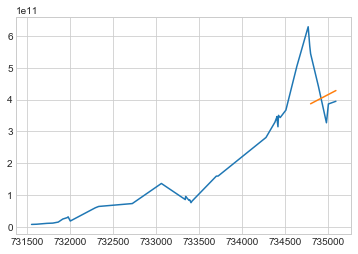

In [254]:

plt.plot(df_test['Date'], df_test['Market_Cap'])
plt.plot(X_test, y_pred)
plt.show()